In [1]:
# Import modules
from pathlib import Path

import polars as pl
import seaborn as sb

current_path = Path(".")
merged_name = "merged_uk_data.csv"
merged_path = current_path.joinpath(merged_name)

df = pl.read_csv(merged_path, infer_schema_length=None)
dfExploded = df.select(
    pl.exclude("frequency").repeat_by("frequency").explode()
)

<Axes: xlabel='distance', ylabel='Probability'>

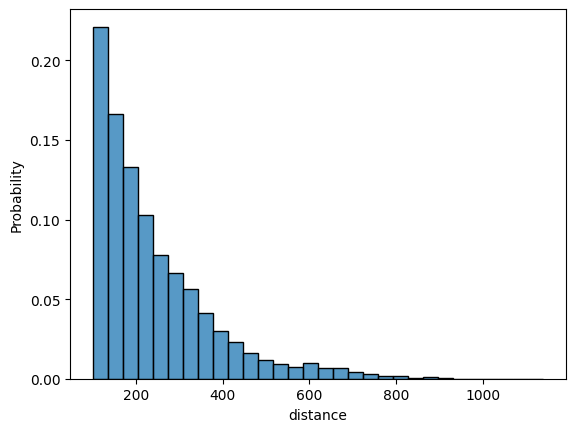

In [2]:
# Histogramm
sb.histplot(dfExploded, x="distance", stat="probability", element="bars", bins=30)

<Axes: xlabel='distance', ylabel='Proportion'>

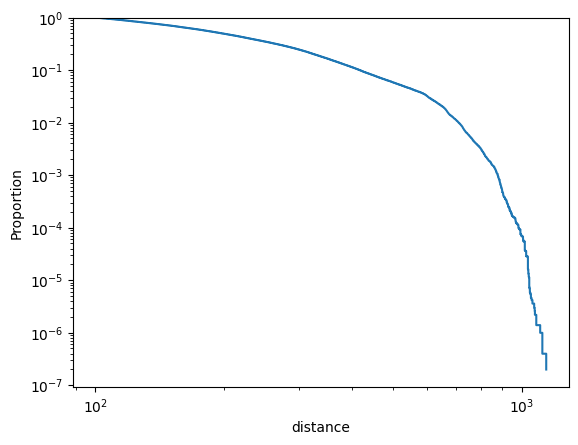

In [5]:
# ECDF Plot
sb.ecdfplot(dfExploded, x="distance", complementary=True, log_scale=(True, True))
# complementary=True, for CCDF

<Axes: xlabel='distance', ylabel='Density'>

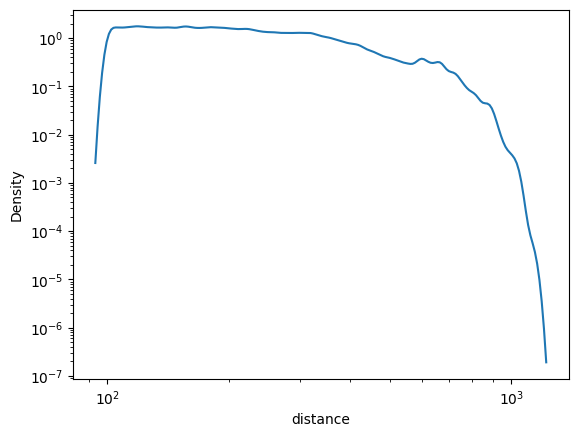

In [4]:
sb.kdeplot(dfExploded, x="distance", log_scale=(True, True))